In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# 1. Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
# Reshape to include channel dimension (28,28,1)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255


In [4]:
# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# 2. Build CNN Model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))  # convolution layer
model.add(MaxPooling2D((2,2)))                                         # pooling layer
model.add(Flatten())                                                   # flatten to vector
model.add(Dense(128, activation='relu'))                               # dense hidden layer
model.add(Dense(10, activation='softmax'))                             # output layer (10 digits)


c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 3. Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:

# 4. Train
history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9360 - loss: 0.2236 - val_accuracy: 0.9744 - val_loss: 0.0810
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9793 - loss: 0.0695 - val_accuracy: 0.9816 - val_loss: 0.0557
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9862 - loss: 0.0457 - val_accuracy: 0.9836 - val_loss: 0.0475
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9904 - loss: 0.0322 - val_accuracy: 0.9824 - val_loss: 0.0543
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9927 - loss: 0.0247 - val_accuracy: 0.9857 - val_loss: 0.0421


In [8]:
# 5. Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 98.57%


In [10]:
import matplotlib.pyplot as plt

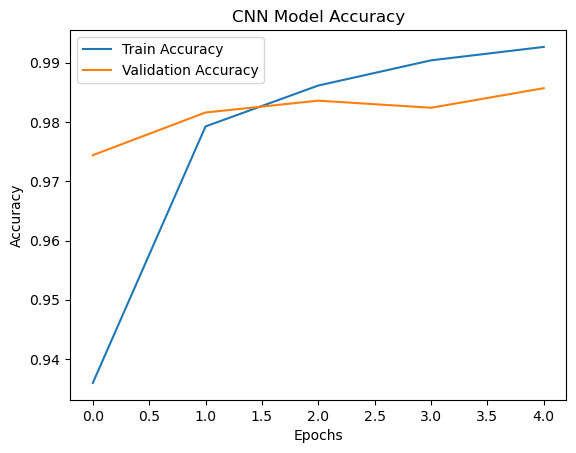

In [11]:
# 6. Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

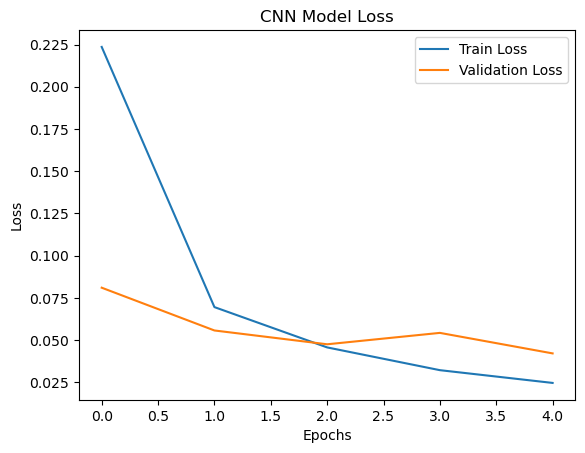

In [12]:
# 7. Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()